In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStatic, nets
from NEATModels.Staticconfig  import static_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/CurieTrainingDatasets/Dalmiro_Laura/LandmarkData/'
npz_name = 'Landmark128.npz'
npz_val_name = 'Landmark128Val.npz'


model_dir = '/home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'Landmark128K7s48d110res.h5'


In [3]:
static_categories_json = model_dir + 'StaticCategories.json'
key_categories = load_json(static_categories_json)
static_cord_json = model_dir + 'StaticCord.json'
key_cord = load_json(static_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
mid_kernel = 7
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 110
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 10
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yolo_v0 = True
show = True
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
stride = 4
show = True
imagex = 128
imagey = 128

In [4]:
config = static_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord, 
                         residual = residual, depth = depth, start_kernel = start_kernel, stride = stride, mid_kernel = mid_kernel,
                         startfiler = startfilter, nboxes = nboxes, gridx = 1, gridy = 1, show = show,
                         epochs = epochs, learning_rate = learning_rate, imagex = imagex, imagey = imagey,
                         batch_size = batch_size, model_name = model_name, yolo_v0 = yolo_v0, multievent = multievent)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

static_config(batch_size=10, box_vector=2, categories=2, depth=29, epochs=250, gridx=1, gridy=1, imagex=128, imagey=128, key_categories={'Background': 0, 'Landmark': 1}, key_cord={'x': 0, 'y': 1}, learning_rate=1e-06, mid_kernel=7, model_name='Landmark128K7s48.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/CurieTrainingDatasets/Dalmiro_Laura/LandmarkData/', npz_name='Landmark128.npz', npz_val_name='Landmark128Val.npz', residual=False, show=True, start_kernel=7, startfilter=32, stride=(4,), yolo_v0=True)


number of  images:	 2656
image size (2D):		 (128, 128)
axes:				 SXYC
channels in / out:		 1
number of  images:	 140
image size (2D):		 (128, 128)
axes:				 SXYC
channels in / out:		 1
(2656, 1, 1, 4) 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 1600        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
______


Train on 2656 samples, validate on 140 samples
Epoch 1/250
2656/2656 [==============================] - 30s 11ms/step - loss: 0.6701 - accuracy: 0.8596 - val_loss: 0.6343 - val_accuracy: 0.8929

Epoch 00001: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.6342529271330152, 'val_accuracy': 0.8928571343421936, 'loss': 0.6700638492243836, 'accuracy': 0.85956323, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

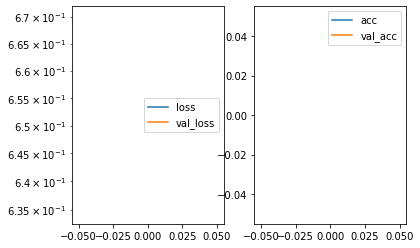

Predicted cell: Landmark Probability: [[0.9136822]]
True Cell type: Landmark
x [[0.5556602]]
True positional value x 0.5
y [[0.35171476]]
True positional value y 0.578125


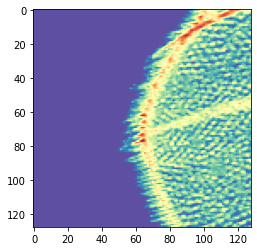

Epoch 2/250
2656/2656 [==============================] - 26s 10ms/step - loss: 0.5808 - accuracy: 0.8904 - val_loss: 0.6060 - val_accuracy: 0.8929

Epoch 00002: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.6060304492712021, 'val_accuracy': 0.8928571343421936, 'loss': 0.5807729507740362, 'accuracy': 0.89043677, 'lr': 1e-06}


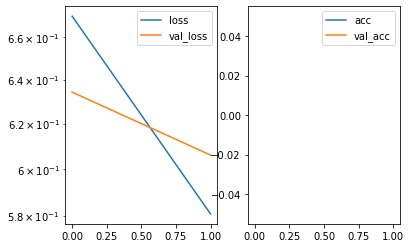

Predicted cell: Landmark Probability: [[0.90518135]]
True Cell type: Landmark
x [[0.7447623]]
True positional value x 0.578125
y [[0.48328903]]
True positional value y 0.5


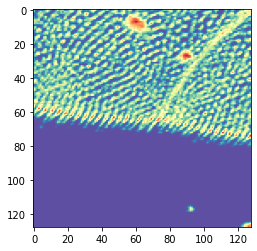

Epoch 3/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.5385 - accuracy: 0.9010 - val_loss: 0.6007 - val_accuracy: 0.8929

Epoch 00003: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.6006653841052737, 'val_accuracy': 0.8928571343421936, 'loss': 0.5385187999401466, 'accuracy': 0.9009789, 'lr': 1e-06}


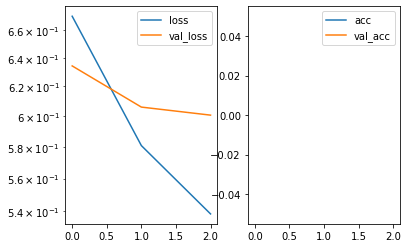

Predicted cell: Landmark Probability: [[0.9396581]]
True Cell type: Landmark
x [[0.44978258]]
True positional value x 0.5781249999999999
y [[0.4985822]]
True positional value y 0.578125


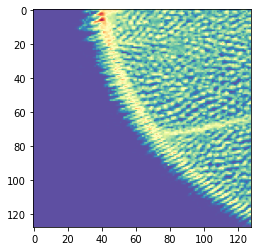

Epoch 4/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.5059 - accuracy: 0.9002 - val_loss: 0.5960 - val_accuracy: 0.8857

Epoch 00004: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5959625861474446, 'val_accuracy': 0.8857142925262451, 'loss': 0.5059011844267328, 'accuracy': 0.9002259, 'lr': 1e-06}


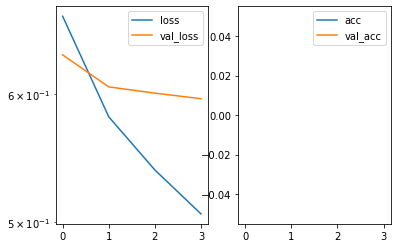

Predicted cell: Landmark Probability: [[0.99428517]]
True Cell type: Landmark
x [[0.42184675]]
True positional value x 0.578125
y [[0.49434748]]
True positional value y 0.578125


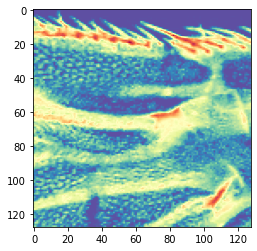

Epoch 5/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.4777 - accuracy: 0.9070 - val_loss: 0.5926 - val_accuracy: 0.9000

Epoch 00005: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5926032896552768, 'val_accuracy': 0.8999999761581421, 'loss': 0.4776883375527988, 'accuracy': 0.907003, 'lr': 1e-06}


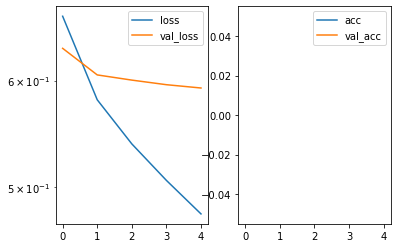

Predicted cell: Landmark Probability: [[0.9393615]]
True Cell type: Landmark
x [[0.42760396]]
True positional value x 0.421875
y [[0.3111259]]
True positional value y 0.5


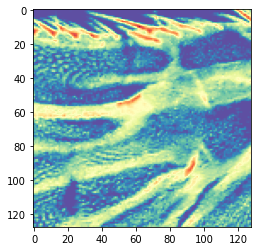

Epoch 6/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.4569 - accuracy: 0.9089 - val_loss: 0.5878 - val_accuracy: 0.9000

Epoch 00006: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5877735870225089, 'val_accuracy': 0.8999999761581421, 'loss': 0.45691070694431485, 'accuracy': 0.90888554, 'lr': 1e-06}


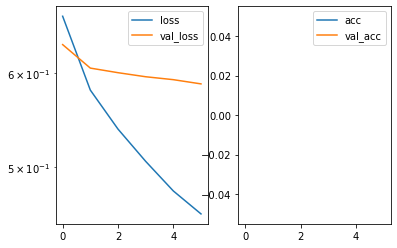

Predicted cell: Landmark Probability: [[0.9947067]]
True Cell type: Background
x [[0.52773255]]
True positional value x 0.5
y [[0.6820328]]
True positional value y 0.5


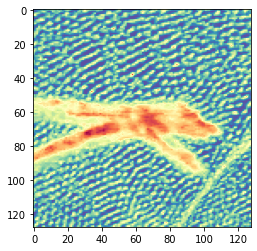

Epoch 7/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.4358 - accuracy: 0.9164 - val_loss: 0.5870 - val_accuracy: 0.9000

Epoch 00007: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5870423402105059, 'val_accuracy': 0.8999999761581421, 'loss': 0.4357949923948351, 'accuracy': 0.9164157, 'lr': 1e-06}


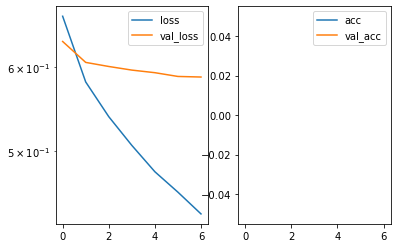

Predicted cell: Landmark Probability: [[0.95510936]]
True Cell type: Landmark
x [[0.77038485]]
True positional value x 0.578125
y [[0.38174388]]
True positional value y 0.421875


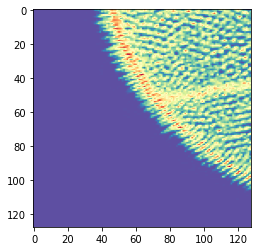

Epoch 8/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.4197 - accuracy: 0.9239 - val_loss: 0.5850 - val_accuracy: 0.9000

Epoch 00008: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5849859757082803, 'val_accuracy': 0.8999999761581421, 'loss': 0.41973732396152363, 'accuracy': 0.9239458, 'lr': 1e-06}


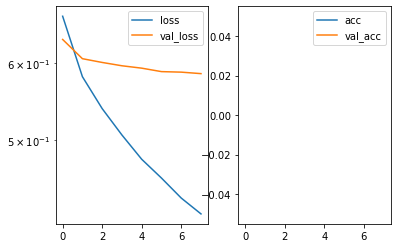

Predicted cell: Landmark Probability: [[0.89958215]]
True Cell type: Landmark
x [[0.3329521]]
True positional value x 0.421875
y [[0.21066836]]
True positional value y 0.5


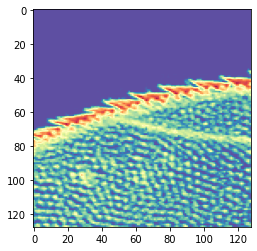

Epoch 9/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.4027 - accuracy: 0.9330 - val_loss: 0.5815 - val_accuracy: 0.9000

Epoch 00009: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5814599458660398, 'val_accuracy': 0.8999999761581421, 'loss': 0.4026655798935028, 'accuracy': 0.9329819, 'lr': 1e-06}


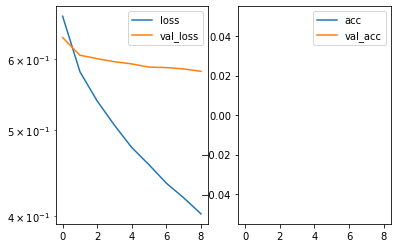

Predicted cell: Landmark Probability: [[0.970339]]
True Cell type: Landmark
x [[0.41925377]]
True positional value x 0.5
y [[0.6636274]]
True positional value y 0.578125


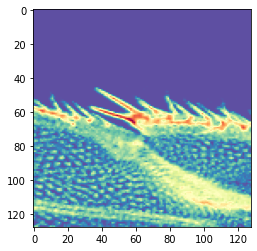

Epoch 10/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.3884 - accuracy: 0.9473 - val_loss: 0.5795 - val_accuracy: 0.9000

Epoch 00010: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5794827959367207, 'val_accuracy': 0.8999999761581421, 'loss': 0.3884374551160867, 'accuracy': 0.94728917, 'lr': 1e-06}


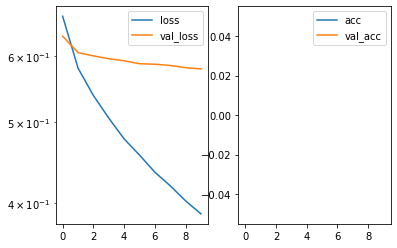

Predicted cell: Landmark Probability: [[0.99048495]]
True Cell type: Landmark
x [[0.49691647]]
True positional value x 0.5
y [[0.42106807]]
True positional value y 0.421875


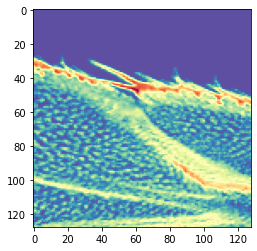

Epoch 11/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.3805 - accuracy: 0.9533 - val_loss: 0.5755 - val_accuracy: 0.9000

Epoch 00011: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.575478515454701, 'val_accuracy': 0.8999999761581421, 'loss': 0.3804883704442217, 'accuracy': 0.95331323, 'lr': 1e-06}


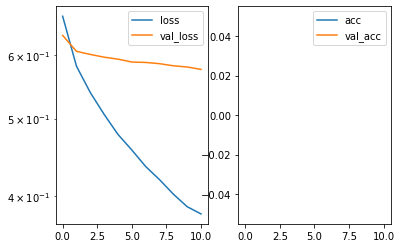

Predicted cell: Landmark Probability: [[0.908051]]
True Cell type: Landmark
x [[0.45472112]]
True positional value x 0.421875
y [[0.2915551]]
True positional value y 0.578125


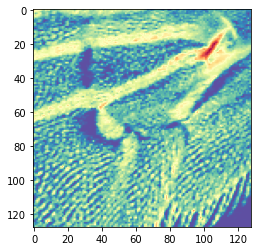

Epoch 12/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.3634 - accuracy: 0.9627 - val_loss: 0.5734 - val_accuracy: 0.9000

Epoch 00012: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5734410498823438, 'val_accuracy': 0.8999999761581421, 'loss': 0.36340548477348794, 'accuracy': 0.9627259, 'lr': 1e-06}


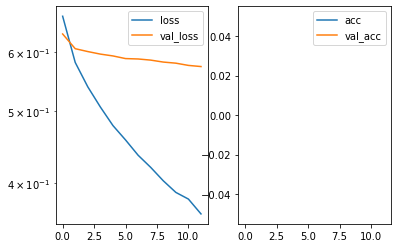

Predicted cell: Landmark Probability: [[0.89903915]]
True Cell type: Landmark
x [[0.5205122]]
True positional value x 0.578125
y [[0.36949232]]
True positional value y 0.578125


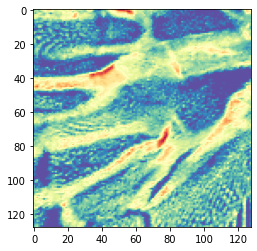

Epoch 13/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.3614 - accuracy: 0.9725 - val_loss: 0.5731 - val_accuracy: 0.9000

Epoch 00013: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5730662729058947, 'val_accuracy': 0.8999999761581421, 'loss': 0.3614225541746401, 'accuracy': 0.97251505, 'lr': 1e-06}


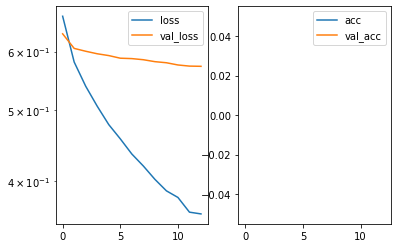

Predicted cell: Landmark Probability: [[0.75369096]]
True Cell type: Background
x [[0.7616853]]
True positional value x 0.5
y [[0.4613518]]
True positional value y 0.5


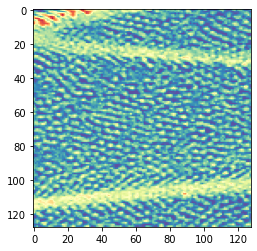

Epoch 14/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.3513 - accuracy: 0.9725 - val_loss: 0.5715 - val_accuracy: 0.9000

Epoch 00014: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5714717294488635, 'val_accuracy': 0.8999999761581421, 'loss': 0.35130869442350177, 'accuracy': 0.97251505, 'lr': 1e-06}


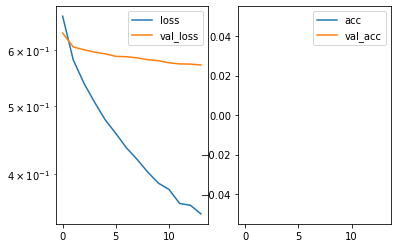

Predicted cell: Landmark Probability: [[0.9951697]]
True Cell type: Landmark
x [[0.5655142]]
True positional value x 0.5
y [[0.59870124]]
True positional value y 0.421875


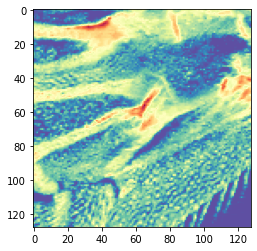

Epoch 15/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.3436 - accuracy: 0.9831 - val_loss: 0.5712 - val_accuracy: 0.9000

Epoch 00015: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5712250620126724, 'val_accuracy': 0.8999999761581421, 'loss': 0.34364146312855814, 'accuracy': 0.9830572, 'lr': 1e-06}


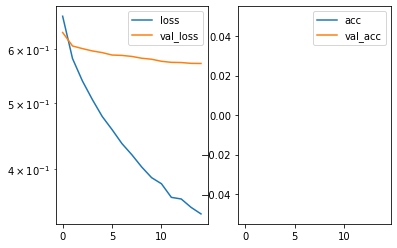

Predicted cell: Landmark Probability: [[0.955728]]
True Cell type: Landmark
x [[0.6484182]]
True positional value x 0.578125
y [[0.4846253]]
True positional value y 0.421875


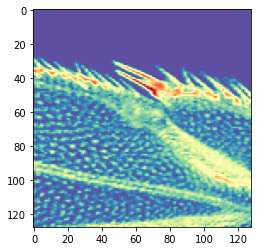

Epoch 16/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.3362 - accuracy: 0.9827 - val_loss: 0.5713 - val_accuracy: 0.9000

Epoch 00016: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.571301777447973, 'val_accuracy': 0.8999999761581421, 'loss': 0.3361541431127901, 'accuracy': 0.98268074, 'lr': 1e-06}


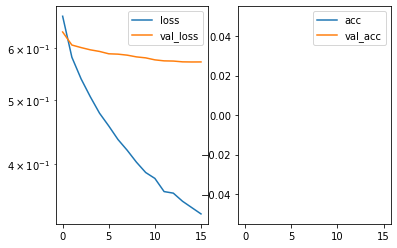

Predicted cell: Landmark Probability: [[0.99377257]]
True Cell type: Landmark
x [[0.7029406]]
True positional value x 0.5
y [[0.7068032]]
True positional value y 0.578125


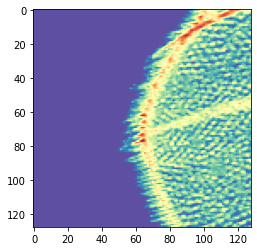

Epoch 17/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.3313 - accuracy: 0.9883 - val_loss: 0.5734 - val_accuracy: 0.9000

Epoch 00017: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5734316472496305, 'val_accuracy': 0.8999999761581421, 'loss': 0.3312659048621195, 'accuracy': 0.98832834, 'lr': 1e-06}


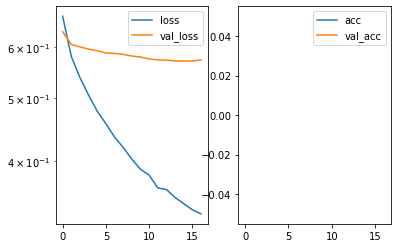

Predicted cell: Landmark Probability: [[0.99642783]]
True Cell type: Landmark
x [[0.5766922]]
True positional value x 0.5
y [[0.640164]]
True positional value y 0.421875


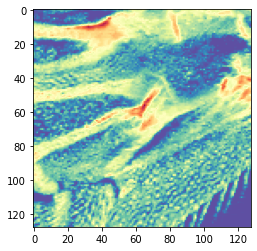

Epoch 18/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.3250 - accuracy: 0.9917 - val_loss: 0.5710 - val_accuracy: 0.9000

Epoch 00018: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5710492261818477, 'val_accuracy': 0.8999999761581421, 'loss': 0.3249913893684924, 'accuracy': 0.99171686, 'lr': 1e-06}


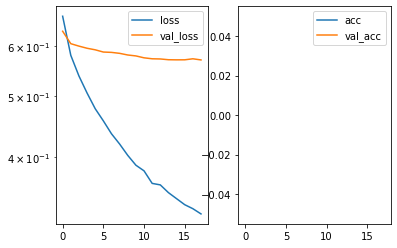

Predicted cell: Landmark Probability: [[0.9934628]]
True Cell type: Landmark
x [[0.5287884]]
True positional value x 0.421875
y [[0.43011868]]
True positional value y 0.421875


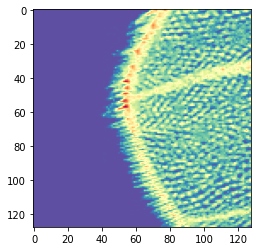

Epoch 19/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.3213 - accuracy: 0.9925 - val_loss: 0.5694 - val_accuracy: 0.9071

Epoch 00019: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5693721239055906, 'val_accuracy': 0.9071428775787354, 'loss': 0.32127392150641204, 'accuracy': 0.9924699, 'lr': 1e-06}


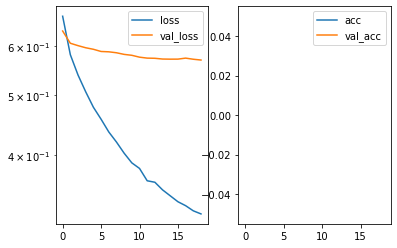

Predicted cell: Landmark Probability: [[0.96114695]]
True Cell type: Landmark
x [[0.8258738]]
True positional value x 0.578125
y [[0.3067078]]
True positional value y 0.578125


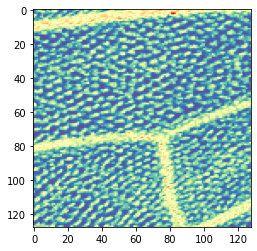

Epoch 20/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.3161 - accuracy: 0.9947 - val_loss: 0.5699 - val_accuracy: 0.9000

Epoch 00020: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5698690095118114, 'val_accuracy': 0.8999999761581421, 'loss': 0.31610186990485134, 'accuracy': 0.9947289, 'lr': 1e-06}


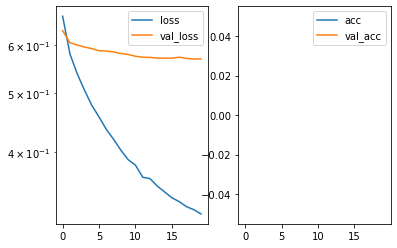

Predicted cell: Landmark Probability: [[0.9551895]]
True Cell type: Landmark
x [[0.80869687]]
True positional value x 0.578125
y [[0.5715674]]
True positional value y 0.578125


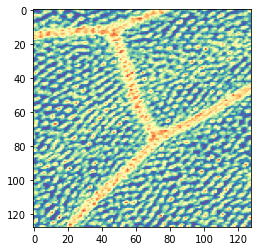

Epoch 21/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.3119 - accuracy: 0.9970 - val_loss: 0.5706 - val_accuracy: 0.9071

Epoch 00021: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.570579760840961, 'val_accuracy': 0.9071428775787354, 'loss': 0.31185206070721866, 'accuracy': 0.99698794, 'lr': 1e-06}


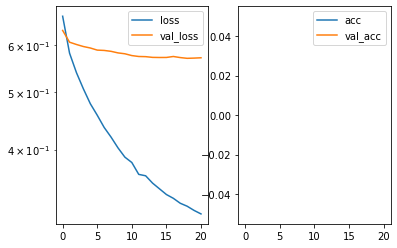

Predicted cell: Landmark Probability: [[0.97017473]]
True Cell type: Landmark
x [[0.5992987]]
True positional value x 0.5
y [[0.4915762]]
True positional value y 0.421875


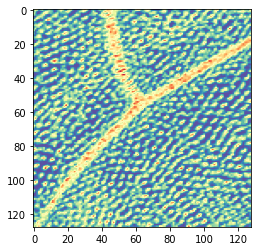

Epoch 22/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.3109 - accuracy: 0.9955 - val_loss: 0.5687 - val_accuracy: 0.9071

Epoch 00022: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5687489488295147, 'val_accuracy': 0.9071428775787354, 'loss': 0.31088110642978944, 'accuracy': 0.9954819, 'lr': 1e-06}


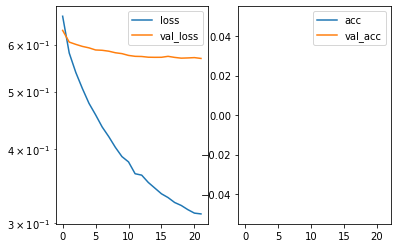

Predicted cell: Landmark Probability: [[0.9976676]]
True Cell type: Landmark
x [[0.10607652]]
True positional value x 0.421875
y [[0.6522102]]
True positional value y 0.421875


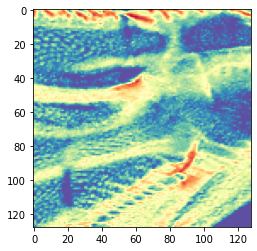

Epoch 23/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.3061 - accuracy: 0.9959 - val_loss: 0.5716 - val_accuracy: 0.9071

Epoch 00023: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5716489148991448, 'val_accuracy': 0.9071428775787354, 'loss': 0.3060530495257622, 'accuracy': 0.99585843, 'lr': 1e-06}


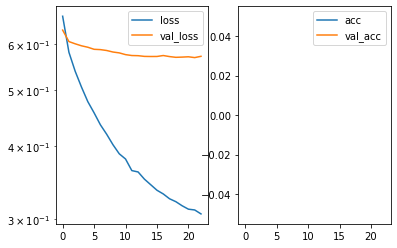

Predicted cell: Landmark Probability: [[0.9644238]]
True Cell type: Landmark
x [[0.49336812]]
True positional value x 0.5
y [[0.5079066]]
True positional value y 0.421875


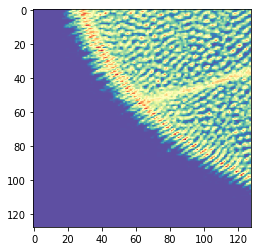

Epoch 24/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.3048 - accuracy: 0.9966 - val_loss: 0.5697 - val_accuracy: 0.9071

Epoch 00024: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5696825619254794, 'val_accuracy': 0.9071428775787354, 'loss': 0.30483836772660894, 'accuracy': 0.9966114, 'lr': 1e-06}


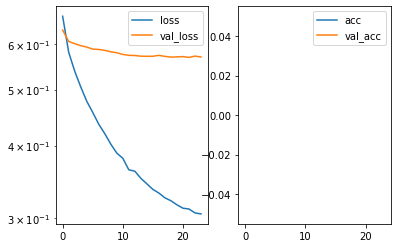

Predicted cell: Landmark Probability: [[0.9774279]]
True Cell type: Landmark
x [[0.4112251]]
True positional value x 0.5
y [[0.7462654]]
True positional value y 0.578125


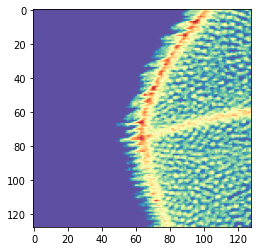

Epoch 25/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.3010 - accuracy: 0.9981 - val_loss: 0.5711 - val_accuracy: 0.9071

Epoch 00025: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5710836499929428, 'val_accuracy': 0.9071428775787354, 'loss': 0.3010389306189784, 'accuracy': 0.99811745, 'lr': 1e-06}


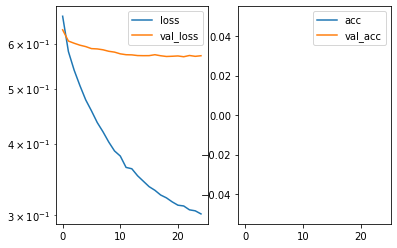

Predicted cell: Landmark Probability: [[0.9787789]]
True Cell type: Landmark
x [[0.44258532]]
True positional value x 0.5
y [[0.76925635]]
True positional value y 0.578125


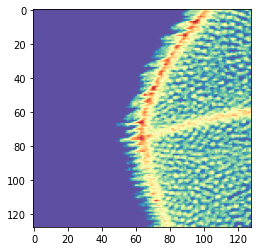

Epoch 26/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2983 - accuracy: 0.9977 - val_loss: 0.5727 - val_accuracy: 0.9071

Epoch 00026: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5727401695081166, 'val_accuracy': 0.9071428775787354, 'loss': 0.2982928865555539, 'accuracy': 0.997741, 'lr': 1e-06}


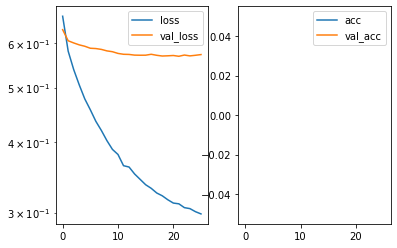

Predicted cell: Landmark Probability: [[0.9969085]]
True Cell type: Landmark
x [[0.5107948]]
True positional value x 0.5
y [[0.3745413]]
True positional value y 0.5


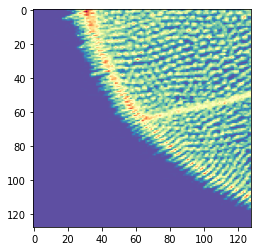

Epoch 27/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2959 - accuracy: 0.9996 - val_loss: 0.5708 - val_accuracy: 0.9071

Epoch 00027: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.57084978052548, 'val_accuracy': 0.9071428775787354, 'loss': 0.2958652336733887, 'accuracy': 0.9996235, 'lr': 1e-06}


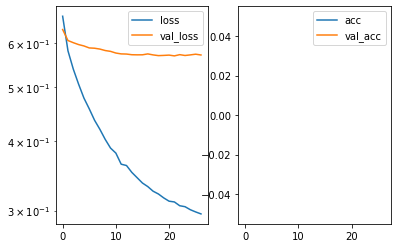

Predicted cell: Landmark Probability: [[0.96714294]]
True Cell type: Landmark
x [[0.8101427]]
True positional value x 0.578125
y [[0.57984215]]
True positional value y 0.578125


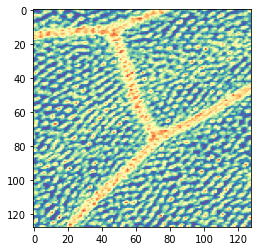

Epoch 28/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2977 - accuracy: 0.9970 - val_loss: 0.5677 - val_accuracy: 0.9071

Epoch 00028: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5676829729761396, 'val_accuracy': 0.9071428775787354, 'loss': 0.29774526764739706, 'accuracy': 0.99698794, 'lr': 1e-06}


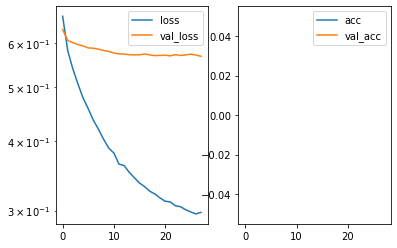

Predicted cell: Landmark Probability: [[0.90135807]]
True Cell type: Landmark
x [[0.45718497]]
True positional value x 0.578125
y [[0.4497268]]
True positional value y 0.421875


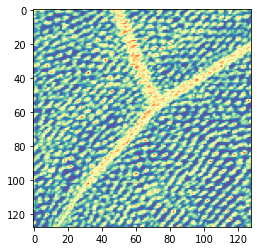

Epoch 29/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2931 - accuracy: 0.9992 - val_loss: 0.5720 - val_accuracy: 0.9071

Epoch 00029: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5720445662736893, 'val_accuracy': 0.9071428775787354, 'loss': 0.2931281721825341, 'accuracy': 0.999247, 'lr': 1e-06}


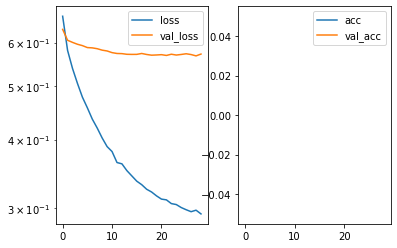

Predicted cell: Landmark Probability: [[0.987479]]
True Cell type: Landmark
x [[0.38107318]]
True positional value x 0.5
y [[0.6525226]]
True positional value y 0.421875


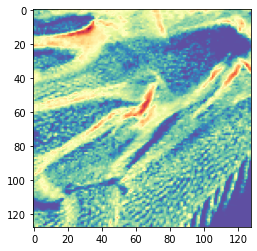

Epoch 30/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2927 - accuracy: 0.9981 - val_loss: 0.5730 - val_accuracy: 0.9071

Epoch 00030: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5729584906782422, 'val_accuracy': 0.9071428775787354, 'loss': 0.292701092155942, 'accuracy': 0.99811745, 'lr': 1e-06}


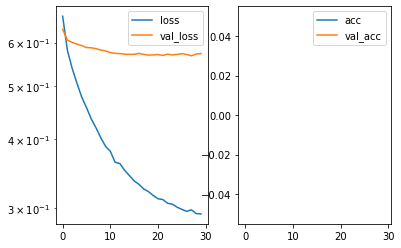

Predicted cell: Landmark Probability: [[0.8623361]]
True Cell type: Landmark
x [[0.4774397]]
True positional value x 0.421875
y [[0.4467612]]
True positional value y 0.578125


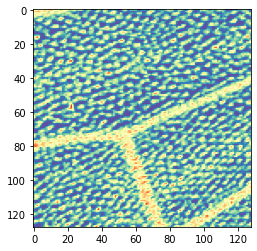

Epoch 31/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2922 - accuracy: 0.9974 - val_loss: 0.5682 - val_accuracy: 0.9071

Epoch 00031: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5681872708456857, 'val_accuracy': 0.9071428775787354, 'loss': 0.2921884659094265, 'accuracy': 0.99736446, 'lr': 1e-06}


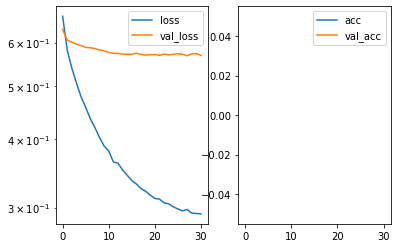

Predicted cell: Landmark Probability: [[0.9261614]]
True Cell type: Landmark
x [[0.40401754]]
True positional value x 0.421875
y [[0.2492501]]
True positional value y 0.5


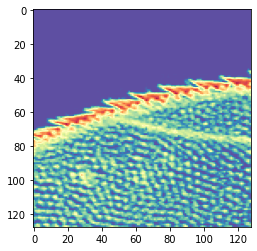

Epoch 32/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2899 - accuracy: 0.9996 - val_loss: 0.5760 - val_accuracy: 0.9071

Epoch 00032: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5759535410574504, 'val_accuracy': 0.9071428775787354, 'loss': 0.2898845722651984, 'accuracy': 0.9996235, 'lr': 1e-06}


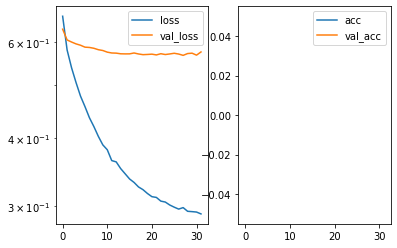

Predicted cell: Landmark Probability: [[0.9940586]]
True Cell type: Landmark
x [[0.28959465]]
True positional value x 0.5
y [[0.5447247]]
True positional value y 0.578125


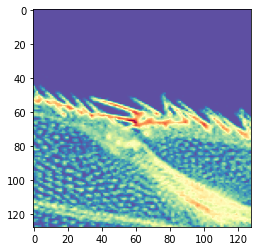

Epoch 33/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2866 - accuracy: 0.9992 - val_loss: 0.5762 - val_accuracy: 0.9071

Epoch 00033: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.576170802116394, 'val_accuracy': 0.9071428775787354, 'loss': 0.28664491722831525, 'accuracy': 0.999247, 'lr': 1e-06}


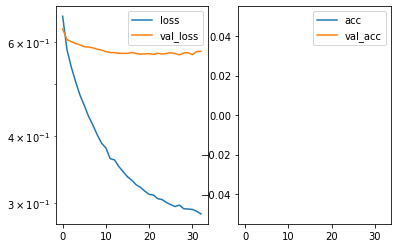

Predicted cell: Landmark Probability: [[0.99545896]]
True Cell type: Landmark
x [[0.5175435]]
True positional value x 0.421875
y [[0.5604564]]
True positional value y 0.578125


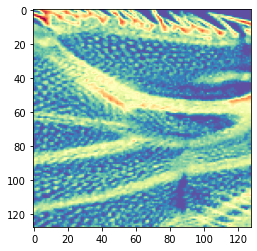

Epoch 34/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2859 - accuracy: 1.0000 - val_loss: 0.5753 - val_accuracy: 0.9071

Epoch 00034: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5753197520971298, 'val_accuracy': 0.9071428775787354, 'loss': 0.2859100984880723, 'accuracy': 1.0, 'lr': 1e-06}


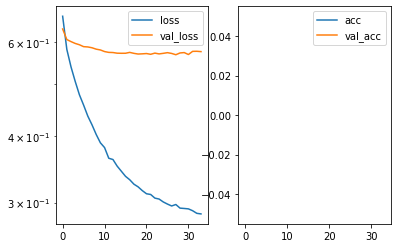

Predicted cell: Landmark Probability: [[0.99782217]]
True Cell type: Landmark
x [[0.7685111]]
True positional value x 0.5
y [[0.48641127]]
True positional value y 0.5


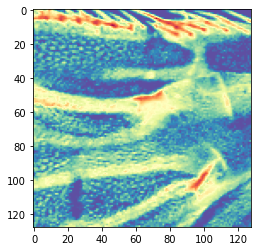

Epoch 35/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2858 - accuracy: 0.9996 - val_loss: 0.5753 - val_accuracy: 0.9071

Epoch 00035: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5752792549984795, 'val_accuracy': 0.9071428775787354, 'loss': 0.28580896850361165, 'accuracy': 0.9996235, 'lr': 1e-06}


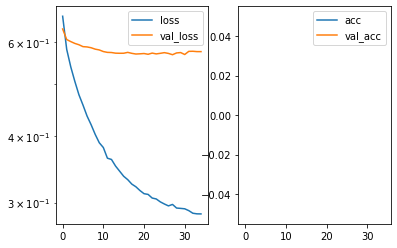

Predicted cell: Landmark Probability: [[0.9772116]]
True Cell type: Landmark
x [[0.8313021]]
True positional value x 0.578125
y [[0.33288556]]
True positional value y 0.578125


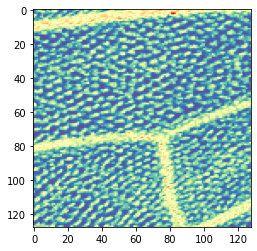

Epoch 36/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2846 - accuracy: 0.9996 - val_loss: 0.5738 - val_accuracy: 0.9071

Epoch 00036: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5738105028867722, 'val_accuracy': 0.9071428775787354, 'loss': 0.284568860431213, 'accuracy': 0.9996235, 'lr': 1e-06}


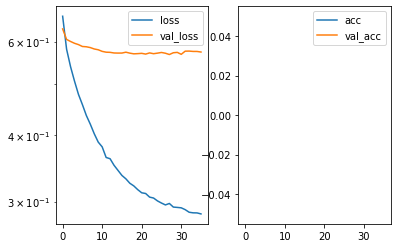

Predicted cell: Landmark Probability: [[0.9920481]]
True Cell type: Landmark
x [[0.45200884]]
True positional value x 0.5781249999999999
y [[0.54585725]]
True positional value y 0.578125


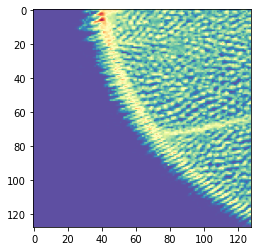

Epoch 37/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2827 - accuracy: 1.0000 - val_loss: 0.5751 - val_accuracy: 0.9071

Epoch 00037: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5751363039016724, 'val_accuracy': 0.9071428775787354, 'loss': 0.28272275900445787, 'accuracy': 1.0, 'lr': 1e-06}


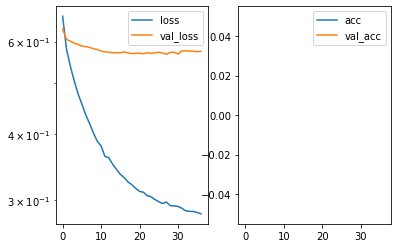

Predicted cell: Landmark Probability: [[0.9505205]]
True Cell type: Landmark
x [[0.73169553]]
True positional value x 0.578125
y [[0.5913881]]
True positional value y 0.421875


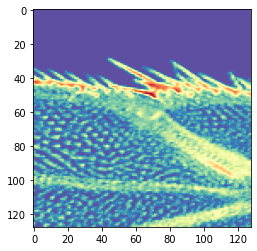

Epoch 38/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2830 - accuracy: 0.9996 - val_loss: 0.5781 - val_accuracy: 0.9071

Epoch 00038: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5780762476580483, 'val_accuracy': 0.9071428775787354, 'loss': 0.2829564077757209, 'accuracy': 0.9996235, 'lr': 1e-06}


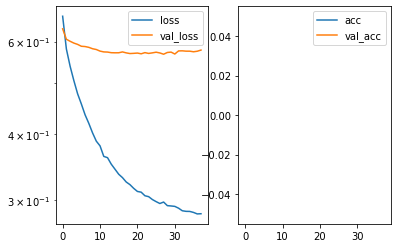

Predicted cell: Landmark Probability: [[0.9917965]]
True Cell type: Landmark
x [[0.5894379]]
True positional value x 0.5
y [[0.5746891]]
True positional value y 0.5


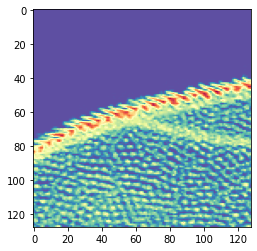

Epoch 39/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2823 - accuracy: 0.9996 - val_loss: 0.5768 - val_accuracy: 0.9071

Epoch 00039: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5767721767936435, 'val_accuracy': 0.9071428775787354, 'loss': 0.2822930964540286, 'accuracy': 0.9996235, 'lr': 1e-06}


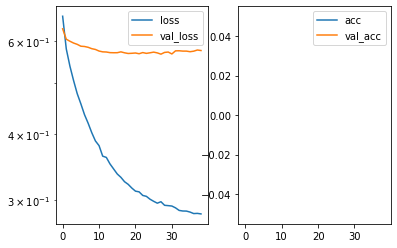

Predicted cell: Landmark Probability: [[0.9463075]]
True Cell type: Landmark
x [[0.35625988]]
True positional value x 0.421875
y [[0.60050535]]
True positional value y 0.421875


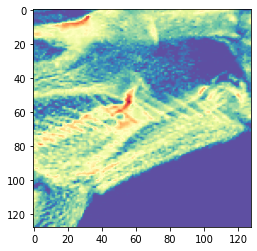

Epoch 40/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2812 - accuracy: 0.9996 - val_loss: 0.5745 - val_accuracy: 0.9071

Epoch 00040: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5745438805648259, 'val_accuracy': 0.9071428775787354, 'loss': 0.2811880168246936, 'accuracy': 0.9996235, 'lr': 1e-06}


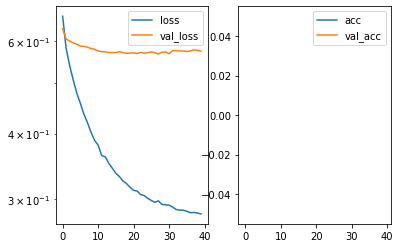

Predicted cell: Landmark Probability: [[0.97723174]]
True Cell type: Landmark
x [[0.7791068]]
True positional value x 0.421875
y [[0.38525292]]
True positional value y 0.421875


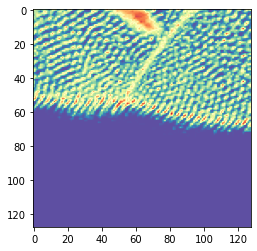

Epoch 41/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2814 - accuracy: 0.9992 - val_loss: 0.5770 - val_accuracy: 0.9071

Epoch 00041: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5770493852240699, 'val_accuracy': 0.9071428775787354, 'loss': 0.2814329163766051, 'accuracy': 0.999247, 'lr': 1e-06}


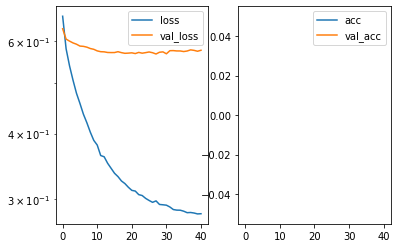

Predicted cell: Landmark Probability: [[0.997849]]
True Cell type: Landmark
x [[0.6757928]]
True positional value x 0.421875
y [[0.6575067]]
True positional value y 0.421875


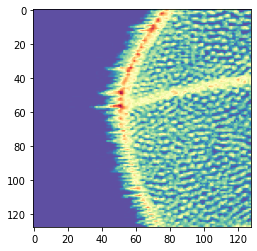

Epoch 42/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2808 - accuracy: 0.9992 - val_loss: 0.5756 - val_accuracy: 0.9071

Epoch 00042: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5755689867905208, 'val_accuracy': 0.9071428775787354, 'loss': 0.2808261117168579, 'accuracy': 0.999247, 'lr': 1e-06}


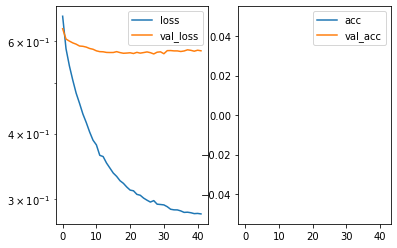

Predicted cell: Landmark Probability: [[0.99772435]]
True Cell type: Landmark
x [[0.47306797]]
True positional value x 0.5
y [[0.39176297]]
True positional value y 0.421875


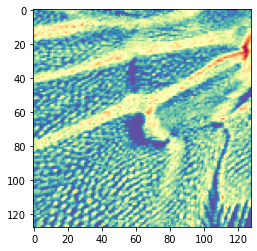

Epoch 43/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2795 - accuracy: 1.0000 - val_loss: 0.5813 - val_accuracy: 0.9071

Epoch 00043: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5812970463718686, 'val_accuracy': 0.9071428775787354, 'loss': 0.27954339126057653, 'accuracy': 1.0, 'lr': 1e-06}


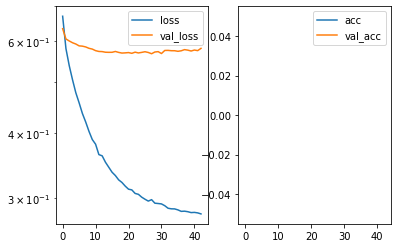

Predicted cell: Landmark Probability: [[0.99516416]]
True Cell type: Landmark
x [[0.7599547]]
True positional value x 0.578125
y [[0.33877477]]
True positional value y 0.421875


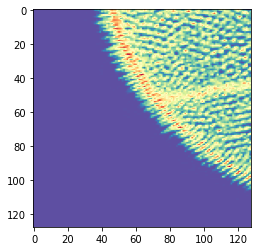

Epoch 44/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2795 - accuracy: 0.9996 - val_loss: 0.5754 - val_accuracy: 0.9071

Epoch 00044: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5754255482128688, 'val_accuracy': 0.9071428775787354, 'loss': 0.27949320942343, 'accuracy': 0.9996235, 'lr': 1e-06}


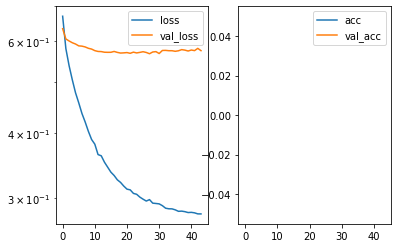

Predicted cell: Landmark Probability: [[0.98811215]]
True Cell type: Landmark
x [[0.5708595]]
True positional value x 0.421875
y [[0.48517075]]
True positional value y 0.5


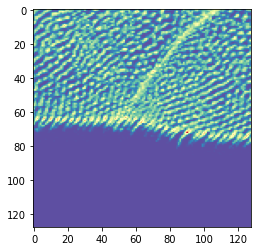

Epoch 45/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2787 - accuracy: 0.9996 - val_loss: 0.5775 - val_accuracy: 0.9071

Epoch 00045: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5774678375039782, 'val_accuracy': 0.9071428775787354, 'loss': 0.2787081080163459, 'accuracy': 0.9996235, 'lr': 1e-06}


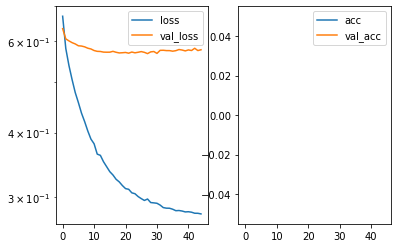

Predicted cell: Landmark Probability: [[0.9819255]]
True Cell type: Landmark
x [[0.5232679]]
True positional value x 0.5
y [[0.5866218]]
True positional value y 0.421875


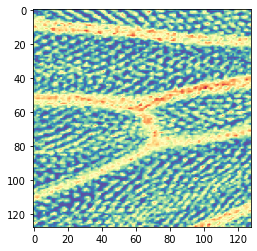

Epoch 46/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2775 - accuracy: 0.9996 - val_loss: 0.5773 - val_accuracy: 0.9071

Epoch 00046: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.577317259141377, 'val_accuracy': 0.9071428775787354, 'loss': 0.2774948798658618, 'accuracy': 0.9996235, 'lr': 1e-06}


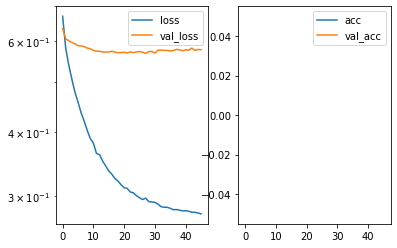

Predicted cell: Landmark Probability: [[0.99571097]]
True Cell type: Landmark
x [[0.6071939]]
True positional value x 0.421875
y [[0.47416443]]
True positional value y 0.578125


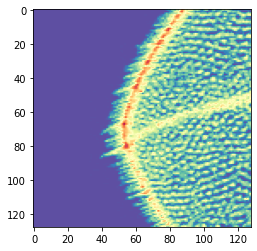

Epoch 47/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2777 - accuracy: 0.9996 - val_loss: 0.5789 - val_accuracy: 0.9071

Epoch 00047: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5788574197462627, 'val_accuracy': 0.9071428775787354, 'loss': 0.2777284355946334, 'accuracy': 0.9996235, 'lr': 1e-06}


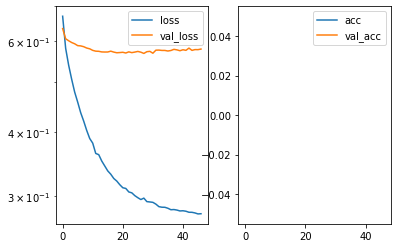

Predicted cell: Landmark Probability: [[0.9900401]]
True Cell type: Landmark
x [[0.4115918]]
True positional value x 0.5
y [[0.6995673]]
True positional value y 0.578125


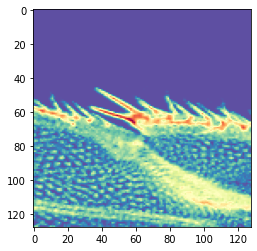

Epoch 48/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2755 - accuracy: 0.9992 - val_loss: 0.5829 - val_accuracy: 0.9071

Epoch 00048: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5829047752278191, 'val_accuracy': 0.9071428775787354, 'loss': 0.2755028518612485, 'accuracy': 0.999247, 'lr': 1e-06}


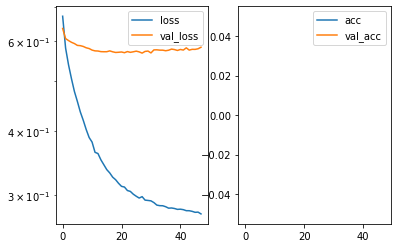

Predicted cell: Landmark Probability: [[0.9991026]]
True Cell type: Landmark
x [[0.453157]]
True positional value x 0.578125
y [[0.37490538]]
True positional value y 0.5


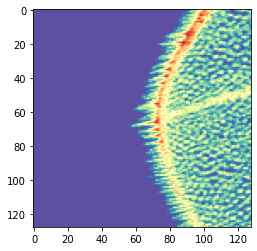

Epoch 49/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2757 - accuracy: 0.9996 - val_loss: 0.5798 - val_accuracy: 0.9071

Epoch 00049: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5798469760588237, 'val_accuracy': 0.9071428775787354, 'loss': 0.2756825389722026, 'accuracy': 0.9996235, 'lr': 1e-06}


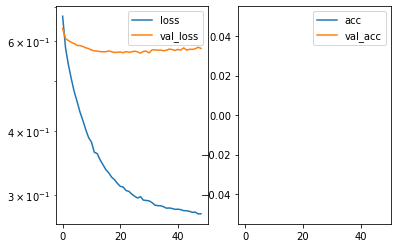

Predicted cell: Landmark Probability: [[0.97629046]]
True Cell type: Landmark
x [[0.38330224]]
True positional value x 0.421875
y [[0.2913844]]
True positional value y 0.5


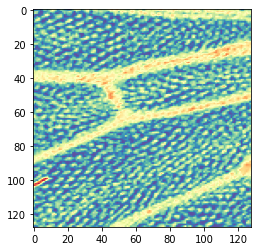

Epoch 50/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2749 - accuracy: 1.0000 - val_loss: 0.5872 - val_accuracy: 0.9071

Epoch 00050: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5871888441698891, 'val_accuracy': 0.9071428775787354, 'loss': 0.27493992126939526, 'accuracy': 1.0, 'lr': 1e-06}


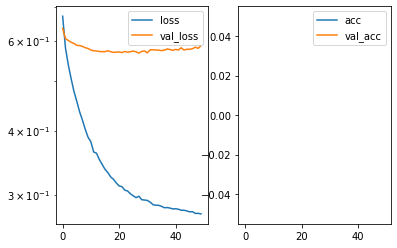

Predicted cell: Landmark Probability: [[0.99433774]]
True Cell type: Landmark
x [[0.5701688]]
True positional value x 0.5
y [[0.5856142]]
True positional value y 0.5


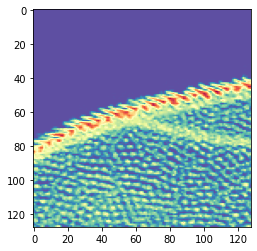

Epoch 51/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2749 - accuracy: 1.0000 - val_loss: 0.5829 - val_accuracy: 0.9071

Epoch 00051: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5828608317034585, 'val_accuracy': 0.9071428775787354, 'loss': 0.27491019603358696, 'accuracy': 1.0, 'lr': 1e-06}


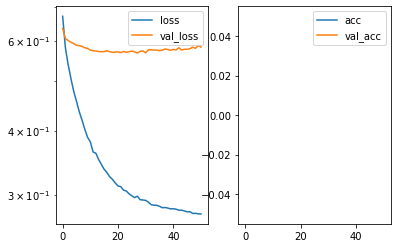

Predicted cell: Landmark Probability: [[0.9841155]]
True Cell type: Landmark
x [[0.5233754]]
True positional value x 0.5
y [[0.58961016]]
True positional value y 0.421875


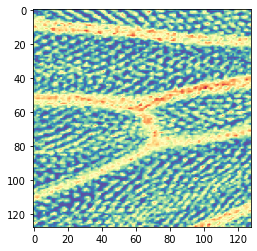

Epoch 52/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2749 - accuracy: 1.0000 - val_loss: 0.5799 - val_accuracy: 0.9071

Epoch 00052: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5799358763865062, 'val_accuracy': 0.9071428775787354, 'loss': 0.2749180622084672, 'accuracy': 1.0, 'lr': 1e-06}


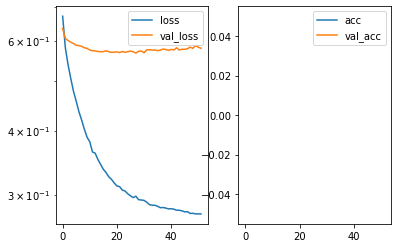

Predicted cell: Landmark Probability: [[0.96363044]]
True Cell type: Landmark
x [[0.7319521]]
True positional value x 0.578125
y [[0.5982773]]
True positional value y 0.421875


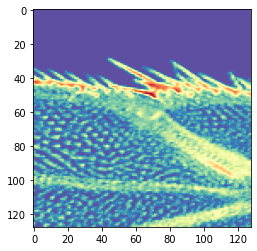

Epoch 53/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2746 - accuracy: 1.0000 - val_loss: 0.5849 - val_accuracy: 0.9071

Epoch 00053: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5849411870752063, 'val_accuracy': 0.9071428775787354, 'loss': 0.27460532428988493, 'accuracy': 1.0, 'lr': 1e-06}


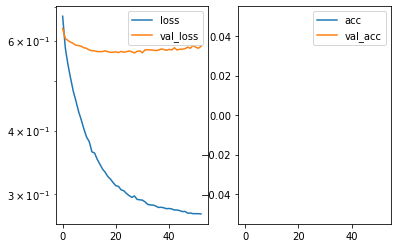

Predicted cell: Background Probability: [[0.818105]]
True Cell type: Background
x [[0.49210194]]
True positional value x 0.5
y [[0.5073625]]
True positional value y 0.5


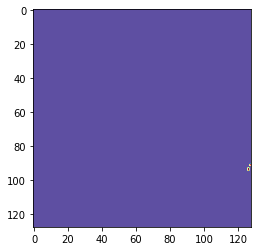

Epoch 54/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2741 - accuracy: 1.0000 - val_loss: 0.5827 - val_accuracy: 0.9071

Epoch 00054: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5826828011444637, 'val_accuracy': 0.9071428775787354, 'loss': 0.2740930191140218, 'accuracy': 1.0, 'lr': 1e-06}


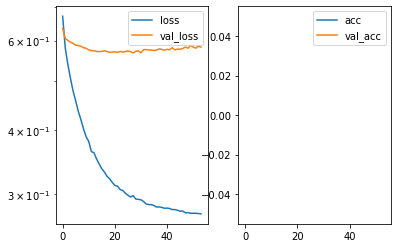

Predicted cell: Landmark Probability: [[0.9890476]]
True Cell type: Landmark
x [[0.7951169]]
True positional value x 0.578125
y [[0.70870346]]
True positional value y 0.421875


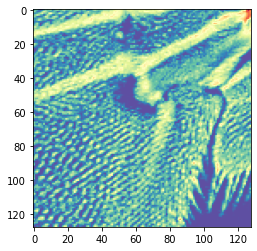

Epoch 55/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2735 - accuracy: 1.0000 - val_loss: 0.5821 - val_accuracy: 0.9071

Epoch 00055: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5820862757308143, 'val_accuracy': 0.9071428775787354, 'loss': 0.27348554821079035, 'accuracy': 1.0, 'lr': 1e-06}


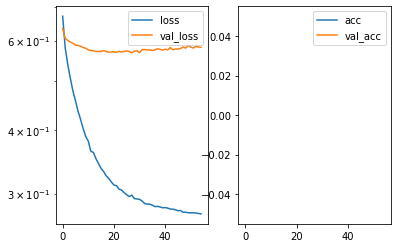

Predicted cell: Landmark Probability: [[0.9965701]]
True Cell type: Landmark
x [[0.52393615]]
True positional value x 0.421875
y [[0.55443174]]
True positional value y 0.5


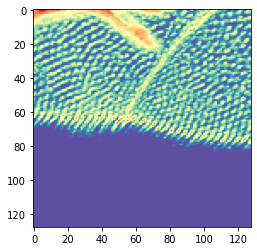

Epoch 56/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2740 - accuracy: 0.9985 - val_loss: 0.5807 - val_accuracy: 0.9071

Epoch 00056: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5807479066508157, 'val_accuracy': 0.9071428775787354, 'loss': 0.27400834981845806, 'accuracy': 0.99849397, 'lr': 1e-06}


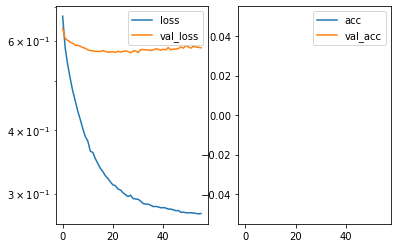

Predicted cell: Landmark Probability: [[0.9582809]]
True Cell type: Landmark
x [[0.8471129]]
True positional value x 0.5
y [[0.6071176]]
True positional value y 0.5


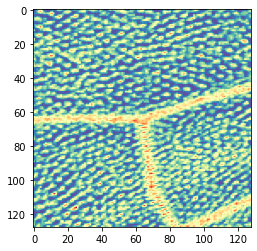

Epoch 57/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2728 - accuracy: 1.0000 - val_loss: 0.5801 - val_accuracy: 0.9071

Epoch 00057: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5800965577363968, 'val_accuracy': 0.9071428775787354, 'loss': 0.2728135525866086, 'accuracy': 1.0, 'lr': 1e-06}


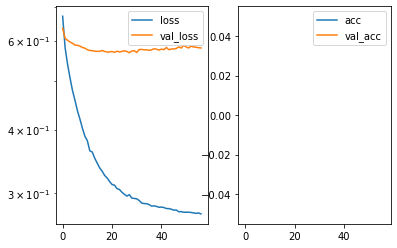

Predicted cell: Landmark Probability: [[0.9860438]]
True Cell type: Landmark
x [[0.63165087]]
True positional value x 0.5
y [[0.5287674]]
True positional value y 0.5


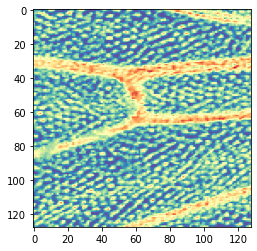

Epoch 58/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2721 - accuracy: 0.9996 - val_loss: 0.5878 - val_accuracy: 0.9071

Epoch 00058: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5878062929425921, 'val_accuracy': 0.9071428775787354, 'loss': 0.27213611927287407, 'accuracy': 0.9996235, 'lr': 1e-06}


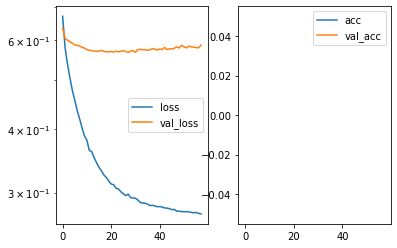

Predicted cell: Landmark Probability: [[0.9978315]]
True Cell type: Landmark
x [[0.44129544]]
True positional value x 0.5
y [[0.31696457]]
True positional value y 0.578125


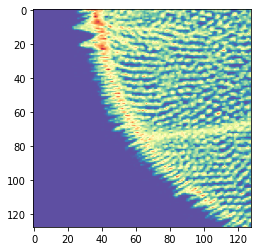

Epoch 59/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2730 - accuracy: 0.9996 - val_loss: 0.5799 - val_accuracy: 0.9071

Epoch 00059: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5799068084784916, 'val_accuracy': 0.9071428775787354, 'loss': 0.27295940061918944, 'accuracy': 0.9996235, 'lr': 1e-06}


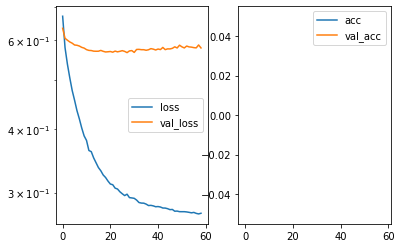

Predicted cell: Landmark Probability: [[0.9987023]]
True Cell type: Landmark
x [[0.67518926]]
True positional value x 0.421875
y [[0.6851693]]
True positional value y 0.421875


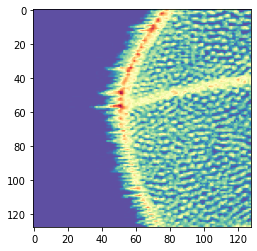

Epoch 60/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2718 - accuracy: 1.0000 - val_loss: 0.5846 - val_accuracy: 0.9071

Epoch 00060: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5846222788095474, 'val_accuracy': 0.9071428775787354, 'loss': 0.2717701699135892, 'accuracy': 1.0, 'lr': 1e-06}


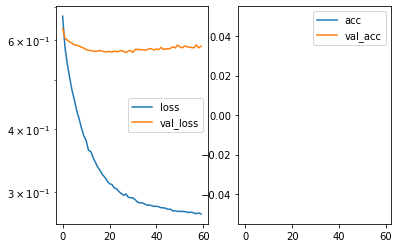

Predicted cell: Landmark Probability: [[0.94833016]]
True Cell type: Landmark
x [[0.6804875]]
True positional value x 0.5
y [[0.61188346]]
True positional value y 0.578125


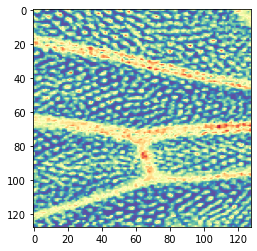

Epoch 61/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2717 - accuracy: 1.0000 - val_loss: 0.5864 - val_accuracy: 0.9071

Epoch 00061: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5864300238234657, 'val_accuracy': 0.9071428775787354, 'loss': 0.27170244716556674, 'accuracy': 1.0, 'lr': 1e-06}


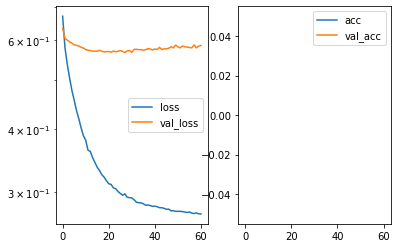

Predicted cell: Landmark Probability: [[0.9504623]]
True Cell type: Landmark
x [[0.21194345]]
True positional value x 0.5
y [[0.40896037]]
True positional value y 0.578125


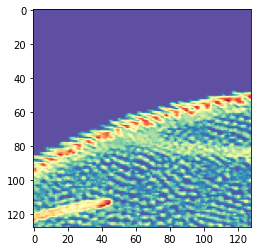

Epoch 62/250
2656/2656 [==============================] - 27s 10ms/step - loss: 0.2715 - accuracy: 1.0000 - val_loss: 0.5842 - val_accuracy: 0.9071

Epoch 00062: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5841957202979496, 'val_accuracy': 0.9071428775787354, 'loss': 0.2715030474565833, 'accuracy': 1.0, 'lr': 1e-06}


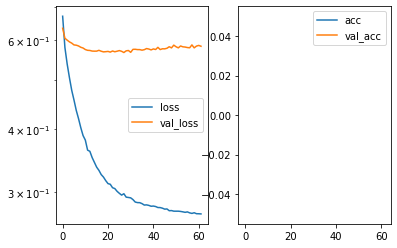

Predicted cell: Landmark Probability: [[0.9210706]]
True Cell type: Landmark
x [[0.37301224]]
True positional value x 0.421875
y [[0.55018675]]
True positional value y 0.578125


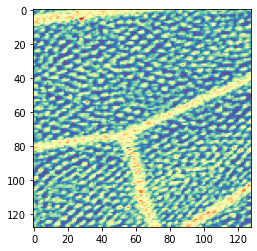

Epoch 63/250
2656/2656 [==============================] - 28s 11ms/step - loss: 0.2706 - accuracy: 0.9992 - val_loss: 0.5861 - val_accuracy: 0.9071

Epoch 00063: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5861350808824811, 'val_accuracy': 0.9071428775787354, 'loss': 0.2705542040786829, 'accuracy': 0.999247, 'lr': 1e-06}


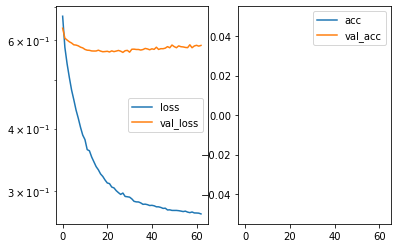

Predicted cell: Landmark Probability: [[0.96100307]]
True Cell type: Landmark
x [[0.46243343]]
True positional value x 0.578125
y [[0.4405096]]
True positional value y 0.421875


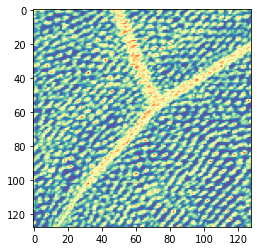

Epoch 64/250
2656/2656 [==============================] - 28s 11ms/step - loss: 0.2701 - accuracy: 1.0000 - val_loss: 0.5909 - val_accuracy: 0.9071

Epoch 00064: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.590871832200459, 'val_accuracy': 0.9071428775787354, 'loss': 0.27007985927433853, 'accuracy': 1.0, 'lr': 1e-06}


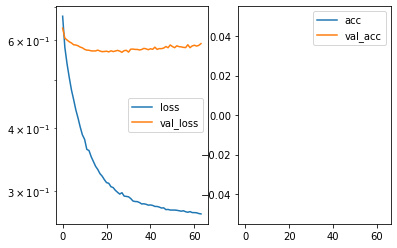

Predicted cell: Landmark Probability: [[0.99650985]]
True Cell type: Landmark
x [[0.20619115]]
True positional value x 0.5
y [[0.49147025]]
True positional value y 0.5


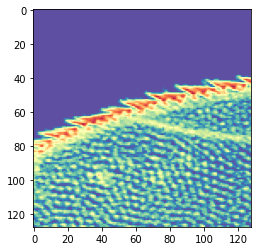

Epoch 65/250
2656/2656 [==============================] - 28s 11ms/step - loss: 0.2704 - accuracy: 1.0000 - val_loss: 0.5905 - val_accuracy: 0.9071

Epoch 00065: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48.h5
{'val_loss': 0.5905409391437259, 'val_accuracy': 0.9071428775787354, 'loss': 0.27044612831290227, 'accuracy': 1.0, 'lr': 1e-06}


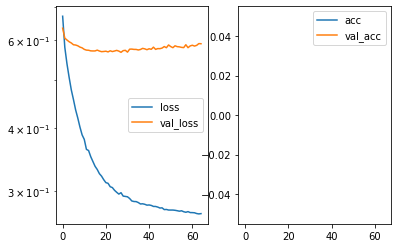

Predicted cell: Landmark Probability: [[0.9948173]]
True Cell type: Landmark
x [[0.38258424]]
True positional value x 0.5781249999999998
y [[0.62860644]]
True positional value y 0.421875


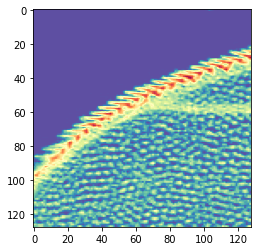

Epoch 66/250
 460/2656 [====>.........................] - ETA: 23s - loss: 0.2697 - accuracy: 1.0000

In [ ]:
static_model = NEATStatic(config, model_dir, model_name)

static_model.loadData()

static_model.TrainModel()
